# Implementing CNN Models for Fashion MNIST

## some imports


In [ ]:
pip install visualkeras

     -------------------------------------- 43.2/43.2 kB 263.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
##Importing modules
import keras
from keras.models import Sequential ,load_model , save_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import adam_v2 ,Adam
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, MaxPooling2D ,Conv3D
from keras.losses import sparse_categorical_crossentropy
from keras.datasets import cifar10
#  import pyplot and alias it as plt
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import visualkeras

### data


In [ ]:
(input_train, target_train), (input_test, target_test) = fashion_mnist.load_data()



4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print('x_train shape:', input_train.shape)
print('y_train shape:', target_train.shape)
print(input_train.shape[0], 'train samples')
print(input_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples


In [ ]:
input_test.shape

(10000, 28, 28)

In [ ]:
input_train =input_train/255
input_test =input_test/255

In [ ]:
input_train=(input_train-np.mean(input_train))/np.std(input_train)
input_test=(input_test-np.mean(input_test))/np.std(input_test)

In [ ]:
# Model configuration
img_width, img_height = 28, 28
batch_size = 128
no_epochs = 100
no_classes = 10
random_state = 1234
validation_split = 0.25
verbosity = 1

In [ ]:
input_test.shape

(10000, 28, 28)

In [ ]:
# Reshape data
input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 1)
input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 1)
input_shape = (img_width, img_height, 1)


In [ ]:
input_test.shape

(10000, 28, 28, 1)

In [ ]:
# Cast numbers to float32
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

print(input_train.shape[0],input_train.shape,input_test.shape)

60000 (60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
input_test.shape


(10000, 28, 28, 1)

### 1st model

In [ ]:

# Create the model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape,strides=(1, 1),padding='same'))
 ##"valid" means no padding. "same" results in padding with zeros
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=sparse_categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])
# print the model architecture
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 4608)              0         
                                                                 
 dense_10 (Dense)            (None, 128)             

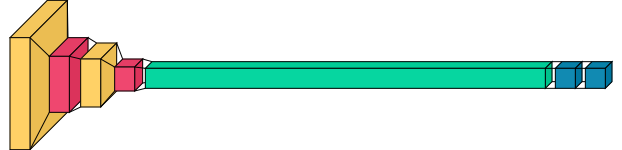

In [ ]:
visualkeras.layered_view(model)

In [ ]:
input_test.shape

(10000, 28, 28, 1)

-  it took this model 9 mins to run on the gpu of colab
-  and 32 mins to run on the cpu




In [ ]:
# Fit data to model
history=model.fit(input_train, target_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split)

Epoch 1/100
1500/1500 [==============================] - 9s 5ms/step - loss: 0.3939 - accuracy: 0.8587 - val_loss: 0.3083 - val_accuracy: 0.8863
Epoch 2/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2532 - accuracy: 0.9085 - val_loss: 0.2649 - val_accuracy: 0.9057
Epoch 3/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2042 - accuracy: 0.9245 - val_loss: 0.2397 - val_accuracy: 0.9133
Epoch 4/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1702 - accuracy: 0.9373 - val_loss: 0.2302 - val_accuracy: 0.9197
Epoch 5/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1387 - accuracy: 0.9488 - val_loss: 0.2495 - val_accuracy: 0.9159
Epoch 6/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1125 - accuracy: 0.9586 - val_loss: 0.2534 - val_accuracy: 0.9187
Epoch 7/100
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0931 - accuracy: 0.9654 - val_loss: 0.2672 - val_ac

In [ ]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# # Save the model
filepath = './saved_model'
save_model(model, filepath)

# Load the model
model = load_model(filepath, compile = True)

Test loss: 1.7138195037841797 / Test accuracy: 0.9165999889373779


### 2nd model

In [ ]:
# Create the model
model_128 = Sequential()
model_128.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape,strides=(1, 1),padding="valid"))
# mode12864alid" means no padding. "same" results in padding with zeros
model_128.add(MaxPooling2D(pool_size=(2, 2)))
model_128.add(Dropout(0.25))
model_128.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model_128.add(MaxPooling2D(pool_size=(2, 2)))
model_128.add(Dropout(0.25))
model_128.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model_128.add(MaxPooling2D(pool_size=(2, 2)))
model_128.add(Dropout(0.25))
model_128.add(Flatten())
model_128.add(Dense(256, activation='relu'))
model_128.add(Dense(no_classes, activation='softmax'))

# Compile the model
model_128.compile(loss=sparse_categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])
# print the model architecture
model_128.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 256)       295168    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 256)        

In [ ]:
# Fit data to model
history=model_128.fit(input_train, target_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split)

# Generate generalization metrics
score = model_128.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# # Save the model
filepath = './saved_model'
save_model(model_128, filepath)

# Load the model
model_64 = load_model(filepath, compile = True)

Epoch 1/100
375/375 [==============================] - 8s 18ms/step - loss: 0.6143 - accuracy: 0.7724 - val_loss: 0.4127 - val_accuracy: 0.8483
Epoch 2/100
375/375 [==============================] - 6s 17ms/step - loss: 0.3987 - accuracy: 0.8537 - val_loss: 0.3591 - val_accuracy: 0.8694
Epoch 3/100
375/375 [==============================] - 6s 17ms/step - loss: 0.3427 - accuracy: 0.8755 - val_loss: 0.3421 - val_accuracy: 0.8727
Epoch 4/100
375/375 [==============================] - 6s 17ms/step - loss: 0.3087 - accuracy: 0.8855 - val_loss: 0.3119 - val_accuracy: 0.8884
Epoch 5/100
375/375 [==============================] - 7s 17ms/step - loss: 0.2805 - accuracy: 0.8965 - val_loss: 0.2897 - val_accuracy: 0.8928
Epoch 6/100
375/375 [==============================] - 6s 17ms/step - loss: 0.2693 - accuracy: 0.9006 - val_loss: 0.2802 - val_accuracy: 0.8978
Epoch 7/100
375/375 [==============================] - 6s 17ms/step - loss: 0.2501 - accuracy: 0.9074 - val_loss: 0.2797 - val_accuracy:

### model 3


In [ ]:
# Create the model
model_256 = Sequential()
model_256.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=input_shape,strides=(1, 1),padding="valid"))
# mode25664alid" means no padding. "same" results in padding with zeros
model_256.add(MaxPooling2D(pool_size=(2, 2)))
model_256.add(Dropout(0.25))
model_256.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model_256.add(MaxPooling2D(pool_size=(2, 2)))
model_256.add(Dropout(0.25))
model_256.add(Conv2D(1024, kernel_size=(3, 3), activation='relu'))
model_256.add(MaxPooling2D(pool_size=(2, 2)))
model_256.add(Dropout(0.25))
model_256.add(Flatten())
model_256.add(Dense(256, activation='relu'))
model_256.add(Dense(no_classes, activation='softmax'))

# Compile the model
model_256.compile(loss=sparse_categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])
# print the model architecture
model_256.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 256)       2560      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 256)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 512)       1180160   
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 512)        0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 512)        

In [ ]:
# Fit data to model
history=model_256.fit(input_train, target_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split)

# Generate generalization metrics
score = model_256.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# # Save the model
filepath = './saved_model'
save_model(model_256, filepath)

# Load the model
model_256 = load_model(filepath, compile = True)

Epoch 1/100
375/375 [==============================] - 18s 42ms/step - loss: 0.5537 - accuracy: 0.7954 - val_loss: 0.3817 - val_accuracy: 0.8601
Epoch 2/100
375/375 [==============================] - 16s 41ms/step - loss: 0.3704 - accuracy: 0.8639 - val_loss: 0.3795 - val_accuracy: 0.8556
Epoch 3/100
375/375 [==============================] - 15s 41ms/step - loss: 0.3197 - accuracy: 0.8809 - val_loss: 0.3129 - val_accuracy: 0.8855
Epoch 4/100
375/375 [==============================] - 15s 41ms/step - loss: 0.2893 - accuracy: 0.8928 - val_loss: 0.2970 - val_accuracy: 0.8896
Epoch 5/100
375/375 [==============================] - 16s 42ms/step - loss: 0.2614 - accuracy: 0.9013 - val_loss: 0.2788 - val_accuracy: 0.8970
Epoch 6/100
375/375 [==============================] - 16s 42ms/step - loss: 0.2400 - accuracy: 0.9098 - val_loss: 0.2802 - val_accuracy: 0.8986
Epoch 7/100
375/375 [==============================] - 15s 41ms/step - loss: 0.2208 - accuracy: 0.9171 - val_loss: 0.2927 - val_ac

### testing on Cifar10


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 503s 3us/step


In [ ]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 100
data_augmentation = False

In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:],strides=(1, 1),padding='same'))
 ##"valid" means no padding. "same" results in padding with zeros
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss=sparse_categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])
# print the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
#one hot encoding
y_train =np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
# Fit data to model
history_=model.fit(x_train, y_train,
          batch_size=32,
          epochs=100,
          verbose=1,
          validation_split=.2)

# Generate generalization metrics
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# # Save the model
filepath = './saved_model'
save_model(model, filepath)

# Load the model
model = load_model(filepath, compile = True)

Epoch 1/100
1250/1250 [==============================] - 80s 63ms/step - loss: 1.7111 - accuracy: 0.3924 - val_loss: 1.4669 - val_accuracy: 0.4851
Epoch 2/100
1250/1250 [==============================] - 107s 86ms/step - loss: 1.3722 - accuracy: 0.5153 - val_loss: 1.2841 - val_accuracy: 0.5552
Epoch 3/100
1250/1250 [==============================] - 90s 72ms/step - loss: 1.2297 - accuracy: 0.5688 - val_loss: 1.2397 - val_accuracy: 0.5582
Epoch 4/100
1250/1250 [==============================] - 88s 71ms/step - loss: 1.1392 - accuracy: 0.6007 - val_loss: 1.1544 - val_accuracy: 0.5996
Epoch 5/100
1250/1250 [==============================] - 86s 68ms/step - loss: 1.0677 - accuracy: 0.6277 - val_loss: 1.0788 - val_accuracy: 0.6266
Epoch 6/100
1250/1250 [==============================] - 80s 64ms/step - loss: 1.0090 - accuracy: 0.6500 - val_loss: 1.0465 - val_accuracy: 0.6415
Epoch 7/100
1250/1250 [==============================] - 79s 63ms/step - loss: 0.9626 - accuracy: 0.6668 - val_loss: 

INFO:tensorflow:Assets written to: ./saved_model\assets


INFO:tensorflow:Assets written to: ./saved_model\assets
